# Kansas City Communities

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import osmnx as ox
from pathlib import Path

In [2]:
kc_wards_url = "https://maps.wycokck.org/gisdata/shp/nbhd_grp_py.zip"
kc_wards_url = "https://maps.wycokck.org/gisdata/shp/parcel_py.zip"
kc_limits_url = "https://maps.wycokck.org/gisdata/shp/city_limit_py.zip"

In [3]:
kc_limits = gpd.read_file(kc_limits_url)
kc_limits = kc_limits[kc_limits['NAME'] == 'Kansas City']
kc_limits.head(2)

,SQ_MILES,COUNTY,NAME,Comment,Munityp,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape__Are,Shape__Len,geometry
3,128.328079,WY,Kansas City,None,None,2022-04-08,2013-02-01,ugebase,None,3.575002e+09,304167.366446,"POLYGON ((2192592.888 299967.587, 2192566.500 ..."


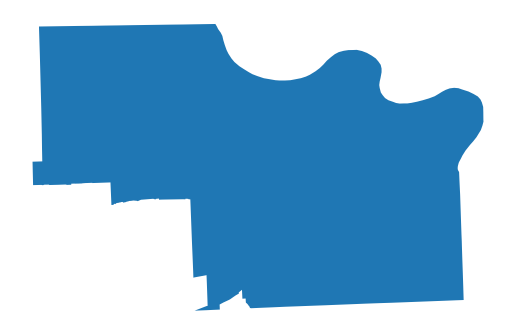

In [4]:
ax = kc_limits.plot()
ax.set_axis_off()

In [5]:
kc_wards = gpd.read_file(kc_wards_url)

In [6]:
kc_wards.columns

Index(['PARCEL', 'PARCEL_NBR', 'ACRE', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [7]:
kc_wards.head(2)

,PARCEL,PARCEL_NBR,ACRE,Shape_Leng,Shape_Area,geometry
0,965301,965301,29.716681,4589.885762,1.294453e+06,"POLYGON ((2191990.626 258094.141, 2190693.698 ..."
1,965200,965200,78.610775,7751.032340,3.424272e+06,"POLYGON ((2191916.085 260421.397, 2190611.717 ..."


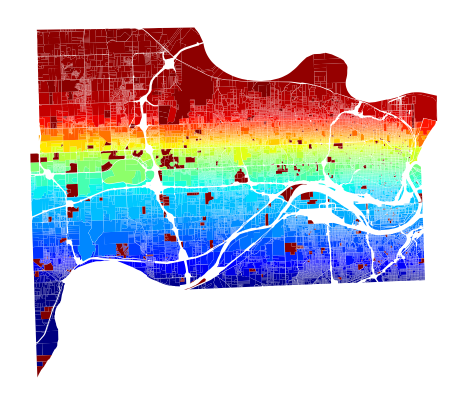

In [320]:
fig, ax = plt.subplots(figsize=(8,5))
kc_wards.plot(ax=ax, 
              # column='NAME',
              # categorical=True, 
            #   legend=True, 
            #   legend_kwds=dict(ncols=4, loc=(-0.1,-0.3)), 
              cmap='jet')
ax.set_axis_off()

In [9]:
pdf_path = Path("C:/Users/sdotson/Zotero/storage/W97N7KE9/2011-neighborhood-directory.pdf")

In [16]:
import camelot

In [316]:
flavor='stream'

x1 = 25
y1 = 670
x2 = 580
y2 = 75
cols = [160, 275, 375, 460]
p1 = 9
p2 = 15
tables = camelot.read_pdf(str(pdf_path), 
                          pages=f"{p1}-{p2}", 
                          flavor=flavor,
                          table_areas=[f'{x1},{y1},{x2},{y2}'],
                          columns=[','.join([str(col) for col in cols])],
                          row_tol=15,
                          column_tol=0,
                          strip_text='.\n',
                          )

In [314]:
combined_list = []
for i,table in enumerate(tables):
    # display(t.df.head())
    t = table.df
    try:
        t.columns = t.loc[0].values
        t = t.drop(labels=0).set_index('Neighborhood Group', drop=True)
        combined_list.append(t)
    except:
        print(f"an error occurred with table {i}")

In [317]:
full_community_list = pd.concat(combined_list, axis=0)

In [318]:
# full_community_list.to_csv("kansas_city_neighborhood_zones.csv")

C:\Users\sdotson\AppData\Local\Temp\ipykernel_17496\2776652246.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig = camelot.plot(tables[0], kind='text').show()


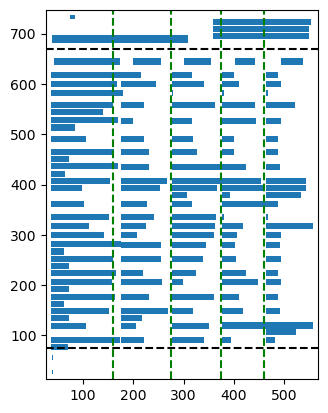

In [283]:
fig = camelot.plot(tables[0], kind='text').show()
ax=plt.gca()
ax.axhline(y=y1, color='k', linestyle='--')
ax.axhline(y=y2, color='k', linestyle='--')
ax.axvline(x=x1, color='k', linestyle='--')
ax.axvline(x=x2, color='k', linestyle='--')

for col in cols:
    ax.axvline(x=col, color='green', linestyle='--')


# Lattice method?

In [357]:
flavor='lattice'

x1 = 25
y1 = 675
x2 = 565
y2 = 55
cols = [160, 275, 375, 460]
p1 = 9
p2 = 10
tables = camelot.read_pdf(str(pdf_path), 
                          pages=f"{p1}-{p2}", 
                          flavor=flavor,
                          table_areas=[f'{x1},{y1},{x2},{y2}'],
                          strip_text='.\n',
                          )
display(tables[0]._bbox)
display(tables[0].df.shape)

(24.96, 55.199999999999996, 564.9599999999999, 675.12)

(24, 6)

C:\Users\sdotson\AppData\Local\Temp\ipykernel_17496\4171315314.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig = camelot.plot(tables[0], kind='joint').show()


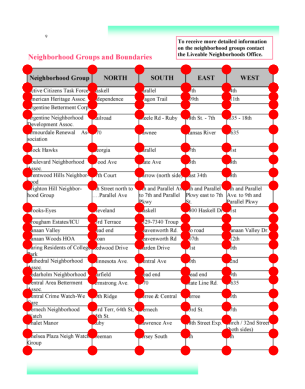

In [361]:
fig = camelot.plot(tables[0], kind='joint').show()
ax=plt.gca()
ax.set_axis_off()

# Street Centerlines KS

In [362]:
ks_streets = gpd.read_file("https://maps.wycokck.org/gisdata/shp/streets_ln.zip")

In [363]:
ks_streets.head(2)

,PRE,NAME,TYPE,OWN_TYPE,ZIP_RIGHT,ZIP_LEFT,OWN_AGENCY,RD_TYPE,ST_DSGN,SRF_TYPE,...,CL_ID,STATUS,SUF,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,LEVEL,Shape_Leng,geometry
0,None,KANSAS,AVE,STATE,66106,66106,None,None,None,None,...,82,OPEN,None,2020-06-11,2008-04-04,JFELTON,None,MAJOR ARTERIAL,360.088115,"LINESTRING (2252984.000 292598.312, 2252624.00..."
1,None,KANSAS,AVE,None,66111,66111,None,None,None,None,...,83,OPEN,None,2020-06-11,2008-04-04,JFELTON,None,MINOR ARTERIAL,266.500592,"LINESTRING (2236485.000 291283.656, 2236352.53..."


In [364]:
ks_streets.columns

Index(['PRE', 'NAME', 'TYPE', 'OWN_TYPE', 'ZIP_RIGHT', 'ZIP_LEFT',
       'OWN_AGENCY', 'RD_TYPE', 'ST_DSGN', 'SRF_TYPE', 'ALT_ACCESS',
       'LANE_COUNT', 'OVER_HGT', 'WGT_LIMIT', 'COMMENT', 'MARC_UPDAT',
       'IMPEDANCE', 'FROM_LEFT', 'FROM_RIGHT', 'TO_LEFT', 'TO_RIGHT',
       'CITY_LEFT', 'CITY_RIGHT', 'TRAVEL_DIR', 'SPEED_LMT', 'FRELEV',
       'TOELEV', 'SOURCE', 'CL_ID', 'STATUS', 'SUF', 'DATE_MOD', 'DATE_ADDED',
       'MOD_BY', 'ADDED_BY', 'LEVEL', 'Shape_Leng', 'geometry'],
      dtype='object')

In [369]:
ks_streets = ks_streets[ks_streets['CITY_RIGHT']=='KANSAS CITY']

In [371]:
ks_streets['LEVEL'].unique()

array(['MAJOR ARTERIAL', 'MINOR ARTERIAL', 'LIMITED ACCESS', 'LOCAL',
       'COLLECTOR'], dtype=object)

In [376]:
ks_streets[ks_streets['LEVEL'] == 'MAJOR ARTERIAL']['NAME'].unique()

array(['KANSAS', 'KAW', 'PARALLEL', 'N 78TH ST TO EB I-70 HWY',
       'RICHMOND', 'STATE', '3RD', '78TH', '7TH ST', 'VICTORY',
       'SB TURNER DIAGONAL TO KANSAS AVE', 'KANSAS AVE',
       'TURNER DIAGONAL', 'NB TURNER DIAGONAL TO S 55TH ST',
       'S 55TH ST TO SB TURNER DIAGONAL', '77TH', None, '130TH', '139TH',
       'POLFER'], dtype=object)

<Axes: >

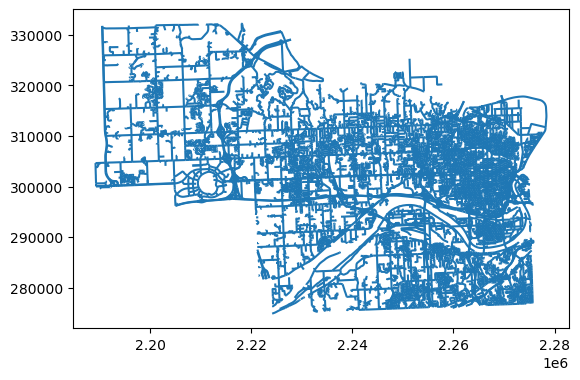

In [368]:
ks_streets[ks_streets['CITY_RIGHT']=='KANSAS CITY'].plot()

In [374]:
full_community_list.loc['Armourdale Renewal    As-sociation']

NORTH            I-70
SOUTH          Pawnee
EAST     Kansas River
WEST            I-635
Name: Armourdale Renewal    As-sociation, dtype: object